# **Seminário PLN**

#**Tema**: Retrieval-Augmented Generation (RAG)
# **Artigo**: How To Summarize Public Opinion Using RAG AI

https://medium.com/@keith-mcnulty/how-to-summarize-public-opinion-using-rag-ai-a4fa0028af33

**Alunos:**
*   Amanda Magalhães Lima, RA: 11201920607
*   José Murillo da Silva Lima, RA: 11201922215





## **Introdução**

*Retrieval-Augmented Generation* (RAG), ou Geração Aumentada por Recuperação, é uma técnica em crescimento, utilizada para melhorar a qualidade das informações retornardas pelos grandes modelos de linguagem.

O RAG funciona da seguinte maneira:

1. **Consulta do Usuário:** O usuário faz uma consulta ou pergunta ao sistema.
2.  **Recuperação de Informações:** O sistema busca informações relevantes em uma base de dados ou conjunto de documentos, utilizando técnicas de recuperação de informações, como buscas por palavras-chave ou modelos de similaridade semântica.
3. **Geração de Resposta:** Utilizando as informações recuperadas, o sistema gera uma resposta coesa e natural por meio de um modelo de linguagem natural, como um modelo de GPT.

Esse processo permite que o sistema combine a precisão da busca de dados com a capacidade de geração de texto, resultando em respostas mais precisas, detalhadas e informativas.

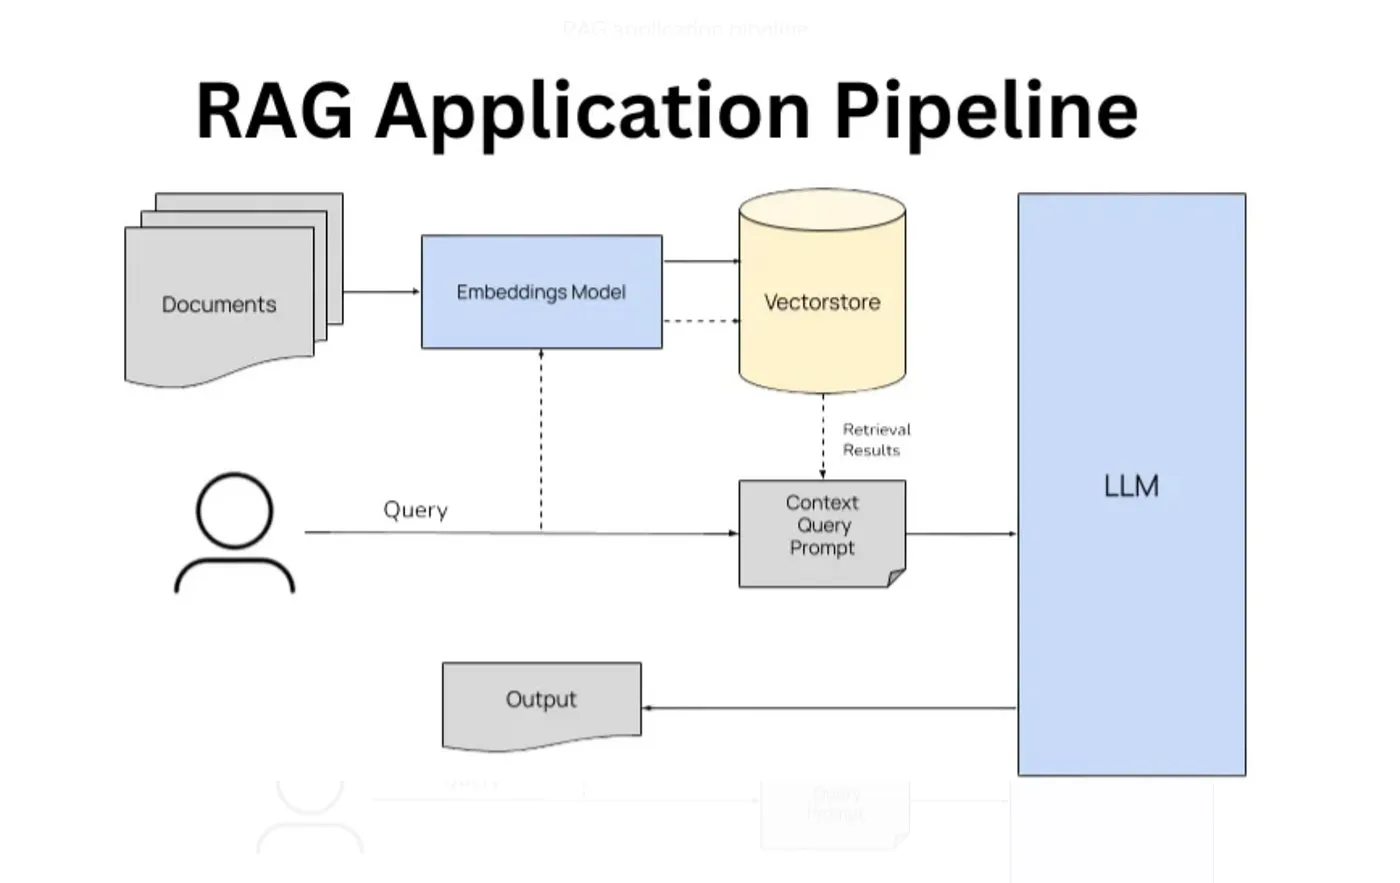

**Aplicações do RAG**

* **Experiência do Cliente:** Em assistentes virtuais e chatbots, o RAG pode fornecer respostas mais precisas e contextualmente relevantes ao buscar informações atualizadas de uma base de dados sobre produtos, políticas de serviço e suporte técnico. Por exemplo, um cliente pode perguntar sobre a disponibilidade de um produto específico, e o RAG pode recuperar informações atualizadas do estoque e gerar uma resposta precisa.

* **Informações Médicas:** Em sistemas de saúde, o RAG pode ser usado para fornecer informações médicas atualizadas aos profissionais de saúde e pacientes. Isso inclui acesso a pesquisas recentes, diretrizes de tratamento e informações sobre medicamentos. Por exemplo, um médico pode perguntar sobre os efeitos colaterais de um novo medicamento, e o RAG pode recuperar informações dos mais recentes artigos de pesquisa e gerar uma resposta detalhada.

* **Educação:** Em plataformas educacionais, o RAG pode ajudar a fornecer conteúdo atualizado e relevante para estudantes e professores. Isso pode incluir explicações detalhadas de conceitos complexos, exemplos práticos e materiais de estudo atualizados. Por exemplo, um estudante pode perguntar sobre um conceito específico em física, e o RAG pode recuperar informações de livros didáticos e artigos recentes para gerar uma resposta compreensível.

**Análise de Conhecimento e Opinião Pública:** Em estudos de mercado e pesquisa social, o RAG pode ajudar a analisar opiniões públicas e tendências. Ao recuperar dados de redes sociais, artigos de notícias e outras fontes públicas, o RAG pode gerar relatórios e insights sobre como a opinião pública está evoluindo em relação a determinados tópicos.

**Aplicação do artigo**

O artigo escolhido demonstra como criar uma aplicação para resumir o que os leitores do jornal New York Times pensam sobre tópicos específicos. Para isso, o autor utiliza um dataset disponibilizado publicamente pelo Kaggle, que contém 2,1 milhões de comentários deixados por leitores nos artigos do New York Times em 2017 e 2018.

## **Desenvolvimento**

### 0 - Instalação de bibliotecas que são utilizadas ao longo do código

#### opendatasets

In [ ]:
# Instalação da biblioteca opendatasets
!pip install opendatasets -q U

#### langchain_community

In [ ]:
!pip install langchain_community -q U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 178.6 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 997.8/997.8 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 393.9/393.9 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.1/149.1 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 2.0 MB/s eta 0:00:00


#### chromadb

In [ ]:
!pip install chromadb -q U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 3.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 584.3/584.3 kB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 64.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 273.8/273.8 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 57.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.6/67.6 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 93.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.5/61.5 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.0/138.0 kB 9.0 MB/s eta 0:00:0

sentence_transformers

In [ ]:
!pip install sentence_transformers -q U

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 5.9 MB/s eta 0:00:00


openai

In [ ]:
!pip install openai -q U

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.9/362.9 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 12.6 MB/s eta 0:00:00


### 1 - Coleta e preparação dos dados
Coletamos os dados utilizando a API do Kaggle, e então mantemos apenas os arquivos que possuam comentários de usuários.


O código abaixo importa as bibliotecas pandas, glob e opendatasets para manipulação e download de dados. Ele define a URL de um dataset do Kaggle contendo comentários dos leitores do New York Times e usa a função od.download() para baixá-lo. Para isso, o usuário deve fornecer suas credenciais do Kaggle. Após o download, o código remove os arquivos CSV de artigos, mantendo apenas os comentários. Em seguida, ele encontra todos os arquivos CSV de comentários de 2017 e 2018, preparando-os para serem carregados em um único DataFrame e arquivo pickle para análise.

{"username":"zemurillo","key":"4f2f4bbb6a17cd45586a49a7d090ebd9"}

In [ ]:
import pandas as pd
import glob
import opendatasets as od
import os
# dataset URL
dataset = 'https://www.kaggle.com/datasets/aashita/nyt-comments/'


# Using opendatasets let's download the data sets (480 MB)
od.download(dataset)

# downloaded folder contains many article csv files - we are not interested in them
# remove article csvs to leave just comments csvs
for f in glob.glob("nyt-comments/Article*"):
    os.remove(f)

# load all 2017 comment csv files into one single dataframe
# Get a list of all CSV files in a directory
csv_files_2017 = glob.glob('nyt-comments/*2017.csv')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: zemurillo
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/aashita/nyt-comments


100%|██████████| 480M/480M [00:04<00:00, 101MB/s] 


In [ ]:
# Create an empty dataframe to store the combined data
combined_df_2017 = pd.DataFrame()

# Loop through each CSV file and append its contents to the combined dataframe
for csv_file in csv_files_2017:
    df = pd.read_csv(csv_file)
    combined_df_2017 = pd.concat([combined_df_2017, df])

# add a column with year
combined_df_2017.loc[:, "year"] = 2017

# select only year and comment body
comments_2017 = combined_df_2017[["year", "commentBody"]]

# repeat for 2018 comments
csv_files_2018 = glob.glob('nyt-comments/*2018.csv')
combined_df_2018 = pd.DataFrame()
for csv_file in csv_files_2018:
    df = pd.read_csv(csv_file)
    combined_df_2018 = pd.concat([combined_df_2018, df])
combined_df_2018.loc[:, "year"] = 2018
comments_2018 = combined_df_2018[["year", "commentBody"]]

# combine into single df with year and comment
comments = pd.concat([comments_2017, comments_2018])

# write to pickle
comments.to_pickle("comments.pickle")

<ipython-input-6-f71397928084>:6: DtypeWarning: Columns (25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)
<ipython-input-6-f71397928084>:6: DtypeWarning: Columns (14,15,31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)
<ipython-input-6-f71397928084>:6: DtypeWarning: Columns (14,15,31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)
<ipython-input-6-f71397928084>:6: DtypeWarning: Columns (32,33) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)
<ipython-input-6-f71397928084>:6: DtypeWarning: Columns (25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)
<ipython-input-6-f71397928084>:19: DtypeWarning: Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_cs

### 2 - Criando um Banco de Dados Vetorial para armazenar todos os nossos comentários de leitores

Neste passo, configuramos um banco de dados vetorial na máquina local (só é recomendado para máquinas potentes) usando Chroma DB e carregamos comentários de leitores nele. Primeiro, excluimos comentários vazios ou muito curtos (com 40 ou menos caracteres) do arquivo pickle e, em seguida, carregamos os comentários no formato de documentos langchain, incluindo metadados como o ano do comentário.

In [ ]:
from langchain_community.document_loaders import DataFrameLoader
import pandas as pd
import numpy as np
import chromadb
from chromadb.utils import embedding_functions
from chromadb.utils.batch_utils import create_batches
import uuid

# load comments df and filter out short or empty comments
comments = pd.read_pickle("comments.pickle")
comments = comments[comments['commentBody'].notnull()]
comments['COUNT'] = [np.char.count(comment, ' ') for comment in comments['commentBody']]
longer_comments = comments[comments['COUNT'] >= 40]

# load into langchain document format
loader = DataFrameLoader(longer_comments, page_content_column="commentBody")
docs = loader.load()

Em seguida, configuramos um Chroma DB no diretório local do nosso projeto. Selecionamos um modelo para converter os comentários em embeddings. Depois, definimos nossa coleção de documentos, dando a cada comentário um ID único e incluindo o ano como um campo de metadados, usando a similaridade cosseno como a função de distância para determinar quais são os documentos mais relevantes para nossa consulta. Demora horas para executar, e podemos simplicifar restringindo ainda mais os documentos, para meses específicos por exemplo.

In [ ]:
print("Número de linhas do dataframe: ", len(longer_comments))

Número de linhas do dataframe:  3084


O daframe possui 1.308.789 linhas

Com essa quantidade o código demorou mais de 12h para rodar e não finalizou, decidi filtrar ainda mais o dataframe de comentários, mantendo apenas comentários com pelo menos 280 caracteres, tendo uma quantidade total de 3084 comentários

In [ ]:
longer_comments = comments[comments['COUNT'] >= 280]
print("Número de linhas do dataframe: ", len(longer_comments))

loader = DataFrameLoader(longer_comments, page_content_column="commentBody")
docs = loader.load()

Número de linhas do dataframe:  3084


In [ ]:
longer_comments

,year,commentBody,COUNT
987,2017,First: Jordan has already taken in more refug...,284
2782,2017,Most of the commenters here are the same Party...,280
3279,2017,Comparisons to other presidents don't matter. ...,669
5997,2017,"Yes, us elites who did not vote for Donald Tru...",280
6256,2017,America is involved in a quasi religious war. ...,293
...,...,...,...
210864,2018,Before I was able to read and being a hyperact...,282
212238,2018,I believe if you did a survey of teacher's you...,283
213943,2018,"These students have my full support, and the s...",280
214991,2018,I am not certain but it appears to me that the...,285


Agora sim transformamos os comentários em embeddings e armazenados no banco de dados vetorial. O código abaixo demorou cerca de 30 minutos.

In [ ]:
#client.delete_collection(COLLECTION_NAME)

In [ ]:
# set up the ChromaDB
CHROMA_DATA_PATH = "./chroma_data/"
EMBED_MODEL = "all-MiniLM-L6-v2"
COLLECTION_NAME = "article_comments"

client = chromadb.PersistentClient(path=CHROMA_DATA_PATH)

# uncomment in case docs have already been written
# client.delete_collection(COLLECTION_NAME)

# enable the DB using Cosine Similarity as the distance metric
embedding_func = embedding_functions.SentenceTransformerEmbeddingFunction(
    model_name=EMBED_MODEL
)

# create document collection in ChromaDB
collection = client.create_collection(
    name=COLLECTION_NAME,
    embedding_function=embedding_func,
    metadata={"hnsw:space": "cosine"},
)

# chromadb has a batch size limit for writing
# create batches with year as metadata, and random UUID
batches = create_batches(
    api=client,
    ids=[f"{uuid.uuid4()}" for i in range(len(docs))],
    documents=[doc.page_content for doc in docs],
    metadatas=[{'year': docs[k].metadata['year']} for k in range(len(docs))]
)

# write batches to chromaDB - over 2M comments n batches of ~40K
# for each comment, chromaDB will store the comment, year, and embedding
# one time write - this will take a while
# if you are impatient you can cut down the number of comments (eg choose a specific month)
for batch in batches:
    print(f"Adding batch of size {len(batch[0])}")
    collection.add(ids=batch[0],
                   documents=batch[3],
                   metadatas=batch[2])
print("Concluido")

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Adding batch of size 3084
Concluido


Depois de tudo pronto, podemos rodar consultas no ChoromaDB, que irá usar o mesmo modelo de embedding para  embutir a consulta e, em seguida, usará a similaridade cosseno para encontrar os comentários de usuários mais próximos no banco de dados

In [ ]:
# test data
results = collection.query(
    query_texts=["What are readers opinions on US foreign policy towards North Korea?"],
    n_results=10,
    include=['documents'],
    where={'year': 2017}
)

# convert results to nice dataframe
results_df = pd.DataFrame(results['documents']).transpose()
results_df.columns = ['Comment']

results_df

,Comment
0,"Unlike Iraq, North Korea does pose a clear dan..."
1,The problem is that the US can only do what So...
2,I have a solution for North Korea.<br/><br/>I ...
3,"I don't know about anyone else, but it sure do..."
4,It is sad to read all this hostility towards T...
5,It is sad to read all this hostility towards T...
6,The North Korea Travel Ban Will Do More Harm T...
7,"Nick, you're cherry picking info to conform to..."
8,"Nick, you're cherry picking info to conform to..."
9,Many if not most of the commenters here simply...


In [ ]:
print("Quantidade de comentários encontrados: ",len(results_df))

Quantidade de comentários encontrados:  10


In [ ]:
results_df.iloc[1,0]

"The problem is that the US can only do what South Korea is willing to allow.  Remember, we have 28 thousand troops at the DMZ but millions could die should matters get out of hand.  Someone, perhaps China should explain to Kim Jung-un that the US would truly feel threatened if N. Korea acquired a ICBM that could reach the Mainland USA.  Many feel that cannot be allowed to happen.  As mentioned, many would die in a N. Korea - US confrontation, but at the end of the day, the US would still be standing and N. Korea would be gone.  Negotiations with that nation have never gone well, even with Kim's father.  There is no benefit to an invasion of the North since they have little that anyone wants.  I suppose we could just say hey, stop the nuke program, allow inspections and we'll help in trade and we can de-militarize the 38 parallel.  Every one wins.  But if they come to the table with just a list of demands, we'll probably end up in conflict.  I think Trump is unfit to serve and can't un

### 3 - Criando uma função que executa o pipeline do RAG

Agora que temos os cometários no nosso banco vetorial, escrevemos uma função que coleta uma pergunta, busca no banco os comentários relacionados com a pergunta, e constrói um prompt para mandar para o LMM

In [ ]:
# helper function for prompt construction
def construct_prompt(docs: dict, question: str) -> str:
    # convert the docs into a numbered list of comments
    results_df = pd.DataFrame(docs['documents']).transpose()
    results_df.columns = ['Comment']
    results_df['ComNum'] = [str(i) for i in range(1, len(results_df) + 1)]
    results_df['Numbered Comments'] = results_df['ComNum'] + '. ' + results_df['Comment']

    # Collect the results in a context
    context = "\n".join([r for r in results_df['Numbered Comments']])

    # construct prompt
    prompt = f"""
        Answer the following question: {question}.
        Refer only to the following numbered list of comments from NY Times readers when answering: {context}.
        Check each numbered comment very carefully and ignore it if it does not contain language that is a close match to the original question.
        Provide as much information as possible in the summary, subject to the conditions already given.
        Begin your answer with 'Based on the responses from selected NY Times readers', and try to give a sense of majority and minority opinions on the topic, but only if there is an identifiable majority opinion.
        If there is not enough information provided to give a summarized opinion, indicate that this is the case.
        """

    return prompt


Agora podemos escrever uma função para o pipeline geral, que receberá uma pergunta, um LLM, um banco de dados, bem como parâmetros para definir o número de documentos correspondentes solicitados e quaisquer filtros necessários. A função, então, encontrará os comentários correspondentes no banco de dados, usará nossa função construct_prompt() para combinar tudo e enviará ao LLM para obter o resultado.Como estamos utilizando o GPT-4o, a função leva em conta o limite da janela de contexto de 128.000 tokens e escondende as credenciais como variáveis de ambiente.

#### Chamando a API da openAI

In [ ]:
import getpass
openai_base_url = 'https://api.openai.com/v1'
openai_api_key = getpass.getpass("Digite sua chave da OpenAI: ")

Digite sua chave da OpenAI: ··········


In [ ]:
# packages
from dotenv import load_dotenv
import openai
import os

# load env variables
load_dotenv()
# openai_base_url = os.getenv('OPENAI_BASE_URL')
# openai_api_key = os.getenv("LLM_TOKEN")

# chromadb location
CHROMA_DATA_PATH = "./chroma_data/"
collection_db="article_comments"

# Initialize an OpenAI client
client = openai.OpenAI(api_key=openai_api_key, base_url=openai_base_url)

# initialize a chroma client
chroma_client = chromadb.PersistentClient(path=CHROMA_DATA_PATH)

# function to execute RAG pipeline using GPT-4
def ask_question_openai(question:str, client = client,
                        collection: chromadb.PersistentClient() = collection_db,
                        n_docs:int = 10, filters: dict ={}) -> str:

    # Find close documents in chromadb
    collection = chroma_client.get_collection(collection)
    results = collection.query(
       query_texts=[question],
       n_results=n_docs,
       where=filters
    )

    prompt = construct_prompt(results, question)

    # send prompt to GPT-4
    chat_completion = client.chat.completions.create(
        messages=[{
                "role": "user",
                "content": prompt,
        }],
        model="gpt-4o",
    )

    # display response
    print(chat_completion.choices[0].message.content)

### 4 - Perguntas para o LLM

#### Teste 1

In [ ]:
ask_question_openai("What are readers opinions on US foreign policy towards North Korea?")

Based on the responses from selected NY Times readers, opinions on US foreign policy towards North Korea are diverse, with some common themes emerging:

1. **Majority Opinion on Threat and Response**: Several readers acknowledge the real threat posed by North Korea, particularly due to its nuclear capabilities, and emphasize the complexity and danger of the situation (Comments 1, 2, 7). These opinions highlight the unpredictable nature of North Korea's leadership and the potential catastrophic consequences of their nuclear arsenal.

2. **Negotiation and Engagement**: There is a consensus that negotiations and dialogue are necessary, but opinions differ on the approach. Some believe in engagement through diplomacy and offering incentives (Comments 3, 4). One reader suggests a unique approach of overwhelming North Korea with goodwill and resources to sway Kim Jong-un towards peace (Comment 3).

3. **Criticism of US Leadership**: Multiple readers express skepticism about the current US le

In [ ]:
ask_question_openai("What are readers opinions on US foreign policy towards North Korea? Answer in brazilian portuguese")

Based on the responses from selected NY Times readers, as provided:

1. A opinião majoritária revela uma preocupação significativa com a ameaça representada pela Coreia do Norte, especialmente em termos de suas armas nucleares e a capacidade de lançar um ICBM que possa atingir o território continental dos Estados Unidos (Comentários 1 e 2). Há uma percepção de que a Coreia do Norte é um perigo real e claro, e que a sua liderança é irracional e perigosa. Isso leva alguns leitores a pensar que um confronto pode ser inevitável.

2. Alguns leitores propõem alternativas mais diplomáticas e pacíficas. Por exemplo, há uma sugestão de que os países do mundo poderiam apoiar a Coreia do Norte economicamente como forma de induzir uma mudança de comportamento (Comentário 3). Outra opinião sugere que a melhor abordagem seria não provocar a Coreia do Norte, mas apoiá-la para afastar o país de seu regime atual (Comentário 7).

3. Outras respostas refletem frustração com a forma como a política exteri

#### Teste 2

In [ ]:
# test data
results = collection.query(
    query_texts=["What are readers opinions on US policy with immigrants"],
    n_results=10,
    include=['documents'],
    where={'year': 2017}
)

# convert results to nice dataframe
results_df = pd.DataFrame(results['documents']).transpose()
results_df.columns = ['Comment']

results_df

,Comment
0,...
1,My husband is an immigrant from Germany- his f...
2,Thank you Masha and Martina for so eloquently ...
3,Immigrating to a new country with a new cultur...
4,I think Trump is a product of how bad the Demo...
5,I am the son of an immigrant. My mother's par...
6,This article hit the nail on the head. Much o...
7,To the readers who say that this work could be...
8,Amazed to read such an ignorant comment from s...
9,I am a retired attorney living in southwestern...


In [ ]:
results_df.iloc[1,0]

'My husband is an immigrant from Germany- his family came as refugees after WW2 since his father\'s place of birth had been taken over by the Soviet Union.  When I told him about the protest today, he put on the "I Am An Immigrant" button he got during the Democratic Convention this summer.  Then tonight we went to get ice cream at La Michoancana,one of our favorite places in Madison WI and it was closed because of the "Day Without Immigrants" protest.  And it made me think.   All of my grandparents were immigrants.  I truly believe that immigration has contributed so much to America.  I love that my children went to school with kids from around the world and that when there was a Class Party, someone always made sure there were turkey franks for the Indian and Muslim kids.  Or when the Asian kids and the Hispanic kids realize they both eat mangoes.  I think the Wall is an asinine idea.  I do have some qualms about just allowing people who came here illegally to remain without any pena

In [ ]:
ask_question_openai("What are readers opinions on US policy with immigrants. Answer in portuguese")

Based on the responses from selected NY Times readers, as follows:

1. Um leitor acredita que não se deve punir os filhos pelos pecados dos pais e apoia a regularização dos Dreamers, destacando a necessidade de uma política imigratória que reflita as necessidades do país e mantenha as famílias unidas. Também sugere que os mais recentes imigrantes ilegais sejam deportados, desde que não tenham cometido ofensas menores.

4. Outro leitor apoia a manutenção dos Dreamers nos EUA, com condições específicas, como permissão para trabalho e educação, mas sem direito a cidadania automática ou a patrocinar outros para imigração. Defende também maior segurança nas fronteiras e procedimentos equitativos para futuros imigrantes.

5. Há leitores que valorizam a contribuição dos imigrantes para a diversidade cultural e a economia dos EUA, e mencionam a importância de tratar os imigrantes com justiça, ao mesmo tempo que criticam a ideia de deportação massiva e o muro na fronteira com o México.

6. Um l

#### Teste 3

In [ ]:
ask_question_openai("O que os leitores acham do aquecimento global? Responda em português")

Based on the responses from selected NY Times readers, não há informações fornecidas nos comentários que abordem diretamente o tópico do aquecimento global. Isso torna impossível fornecer um resumo das opiniões dos leitores sobre o assunto.


#### Teste 4

Redefini as funções mudando o prompt para português, e limitando o número máximo de tokens na saída

In [ ]:
# helper function for prompt construction
def construct_prompt(docs: dict, question: str) -> str:
    # convert the docs into a numbered list of comments
    results_df = pd.DataFrame(docs['documents']).transpose()
    results_df.columns = ['Comment']
    results_df['ComNum'] = [str(i) for i in range(1, len(results_df) + 1)]
    results_df['Numbered Comments'] = results_df['ComNum'] + '. ' + results_df['Comment']

    # Collect the results in a context
    context = "\n".join([r for r in results_df['Numbered Comments']])

    # construct prompt
    prompt = f"""
    Responda a seguite questão em português: {question}.
    Refira-se apenas à seguinte lista numerada de comentários dos leitores do NY Times ao responder: {context}
    Verifique cada comentário numerado com muito cuidado e ignore-o se não contiver uma linguagem que se aproxime da pergunta original.
    Forneça o máximo de informação possível no resumo, respeitando as condições já estabelecidas.
    Caso exista comentários, comece sua resposta com 'Com base nas respostas dos leitores selecionados do NY Times'
    Responda na lingua especificada. Se ele não especificar, responda em português
    """

    return prompt

# packages
from dotenv import load_dotenv
import openai
import os

# load env variables
load_dotenv()
# openai_base_url = os.getenv('OPENAI_BASE_URL')
# openai_api_key = os.getenv("LLM_TOKEN")

# chromadb location
CHROMA_DATA_PATH = "./chroma_data/"
collection_db="article_comments"

# Initialize an OpenAI client
client = openai.OpenAI(api_key=openai_api_key, base_url=openai_base_url)

# initialize a chroma client
chroma_client = chromadb.PersistentClient(path=CHROMA_DATA_PATH)

# function to execute RAG pipeline using GPT-4
def ask_question_openai(question:str, client = client,
                        collection: chromadb.PersistentClient() = collection_db,
                        n_docs:int = 10, filters: dict ={}) -> str:

    # Find close documents in chromadb
    collection = chroma_client.get_collection(collection)
    results = collection.query(
       query_texts=[question],
       n_results=n_docs,
       where=filters
    )

    prompt = construct_prompt(results, question)

    # send prompt to GPT-4
    chat_completion = client.chat.completions.create(
        messages=[{
                "role": "user",
                "content": prompt,
        }],
        model="gpt-4o",
        max_tokens=500 # Ajuste conforme necessário
    )

    # display response
    print(chat_completion.choices[0].message.content)
    return chat_completion.choices[0].message.content

In [ ]:
ask_question_openai("O que os leitores acham do aquecimento global?")

Com base nas respostas dos leitores selecionados do NY Times, não há comentários diretos sobre a questão do aquecimento global. A análise dos comentários disponíveis revela discussões sobre tópicos diversos, como economia, comércio, cultura e experiências pessoais sem qualquer referência explícita ao problema ambiental ou às mudanças climáticas. 

Portanto, não é possível fornecer uma opinião detalhada ou resumo sobre o que os leitores acham do aquecimento global a partir da lista de comentários fornecida.


In [ ]:
ask_question_openai("What are readers opinions on US foreign policy towards North Korea?")

Com base nas respostas dos leitores selecionados do NY Times, podemos observar uma série de opiniões divergentes e complexas sobre a política externa dos Estados Unidos em relação à Coreia do Norte:

1. Há um reconhecimento de que a Coreia do Norte representa uma ameaça clara e presente para os EUA, com armas nucleares que já existem e têm o potencial de causar danos catastróficos. A opinião é de que o regime norte-coreano é irracional e perigoso, e não se pode viver com uma ameaça nuclear iminente (Comentário 1).

2. A situação é complicada pelo fato de que qualquer ação dos EUA depende da concordância da Coreia do Sul, dado que milhões de vidas estão em risco na região. Existe um sentimento de que a Coreia do Norte deve ser desarmada, mas as negociações anteriores não tiveram sucesso, e pode ser necessário um confronto militar inevitável (Comentário 2).

3. Uma perspectiva alternativa sugere uma abordagem mais diplomática e econômica, onde o mundo poderia enviar suprimentos e incenti

'Com base nas respostas dos leitores selecionados do NY Times, podemos observar uma série de opiniões divergentes e complexas sobre a política externa dos Estados Unidos em relação à Coreia do Norte:\n\n1. Há um reconhecimento de que a Coreia do Norte representa uma ameaça clara e presente para os EUA, com armas nucleares que já existem e têm o potencial de causar danos catastróficos. A opinião é de que o regime norte-coreano é irracional e perigoso, e não se pode viver com uma ameaça nuclear iminente (Comentário 1).\n\n2. A situação é complicada pelo fato de que qualquer ação dos EUA depende da concordância da Coreia do Sul, dado que milhões de vidas estão em risco na região. Existe um sentimento de que a Coreia do Norte deve ser desarmada, mas as negociações anteriores não tiveram sucesso, e pode ser necessário um confronto militar inevitável (Comentário 2).\n\n3. Uma perspectiva alternativa sugere uma abordagem mais diplomática e econômica, onde o mundo poderia enviar suprimentos e 

In [ ]:
resposta = ask_question_openai("What are readers opinions on US foreign policy with Mexico? Answer in spanish")

Com base nas respostas dos leitores selecionados do NY Times, aqui estão algumas opiniões sobre a política externa dos EUA com o México:

1. Um leitor menciona que o México é uma nação contemporânea e diversa, e argumenta que a imigração e o cruzamento de fronteira caíram consideravelmente nos últimos anos. Ele sugere que a retórica de Trump está mais focada em agradar sua base enquanto ofende um povo que sua base pouco conhece. Ele também critica a arrogância dos EUA de querer ditar a soberania de outros países e ressalta que, se os EUA querem um muro, devem pagar por ele.

2. Outro leitor aborda temas como imigração e crescimento populacional, culpando os democratas e a mídia por uma percepção de apoio à imigração descontrolada. Ele sugere que a imigração é utilizada politicamente para obter votos e critica a falta de debate sobre questões de livre comércio e regulação bancária.

5. Um comentário destaca a sobrecarga dos sistemas de serviços públicos nos estados fronteiriços devido à